<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas/blob/main/Machine%20Learning/Aprendizaje%20Supervisado/07_Regresi%C3%B3n_Lasso_y_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lasso (L1)

La regresión Lasso también es un modelo lineal regularizado, pero usa una penalización diferente que puede eliminar variables automáticamente.

Función objetivo:

$$min_{w,b} \sum^n_{i=1}(y_i-\hat{y_i})^2+α ∑^p_{j=1}|w_j|$$

Diferencia clave:

Ridge → penaliza $w_j^2$

Lasso → penaliza $|w_j|$ <br><br>

- Muchos coeficientes se hacen exactamente cero
- El modelo se vuelve disperso
- Actúa como selección automática de características

In [2]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import neighbors
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('/content/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']
    print(crime)
    return (X_crime, y_crime)

(X_crime, y_crime) = load_crime_dataset()

      population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0          11980           3.10        12.47        21.44        10.93   
1          23123           2.82        11.01        21.30        10.48   
2          29344           2.43        11.36        25.88        11.01   
3          16656           2.40        12.55        25.20        12.19   
5         140494           2.45        18.09        32.89        20.04   
...          ...            ...          ...          ...          ...   
2210       56216           3.07        15.46        30.16        14.34   
2211       12251           2.68        17.36        31.23        16.97   
2212       32824           2.46        11.81        20.96         9.53   
2213       13547           2.89        17.16        30.01        14.73   
2214       28898           2.61        12.99        25.21        11.63   

      agePct65up  numbUrban  pctUrban  medIncome  pctWWage  ...  \
0          11.33      11980    100.00      7

In [3]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

In [4]:
print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

Crime dataset
lasso regression linear model intercept: 1186.612061998579
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826    

Solo un subconjunto de variables queda activo, el modelo es más interpretable, util cuando pocas variables tienen impacto fuerte

Advertencia:
En problemas complejos (como crimen), los coeficientes reflejan correlaciones, no causalidad.

In [5]:
for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

	PctKidsBornNeverMar, 1488.365
	PctKids2Par, -1188.740
	HousVacant, 459.538
	PctPersDenseHous, 339.045
	NumInShelters, 264.932
	MalePctDivorce, 259.329
	PctWorkMom, -231.423
	pctWInvInc, -169.676
	agePct12t29, -168.183
	PctVacantBoarded, 122.692
	pctUrban, 119.694
	MedOwnCostPctIncNoMtg, -104.571
	MedYrHousBuilt, 91.412
	RentQrange, 86.356
	OwnOccHiQuart, 73.144
	PctEmplManu, -57.530
	PctBornSameState, -49.394
	PctForeignBorn, 23.449
	PctLargHouseFam, 20.144
	PctSameCity85, 5.198


**Efecto de α en Lasso**



In [6]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)

    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



**Comportamiento general**

α pequeño → muchas variables activas

α grande → muy pocas variables

α demasiado grande → subajuste

Existe un compromiso entre la precisión predictiva y la simplicidad del modelo

# Regresión polinomial (Polynomial Regression)


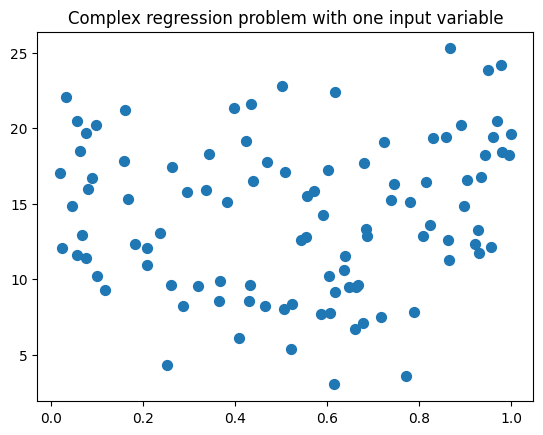

In [7]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

La regresión polinomial no es un modelo no lineal, sino un modelo lineal en un espacio de características transformado.

Ejemplo teórico

Variables originales: $(x_0,x_1)$

Variables transformadas: $(1,x_0,x_1,x_0^2,x_0x_1,x_1^2)$

El modelo sigue siendo: $\hat{y}=w^T𝜙(x)$

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

In [9]:
print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805



**Resultados observados**

Regresión lineal simple

- Bajo poder expresivo

Polinomial sin regularización

- R² entrenamiento ≈ 1

- R² prueba bajo → sobreajuste

Polinomial + Ridge

- Entrenamiento y prueba similares

- Mejor generalización

La expansión de características aumenta la complejidad y debe combinarse con regularización.

In [10]:
print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825


Curvas de coeficientes (Coefficient paths)

Las curvas de coeficientes muestran cómo cambian los pesos del modelo al variar 𝛼.

Eje x:
log
⁡
(
𝛼
)

Eje y: valor del coeficiente

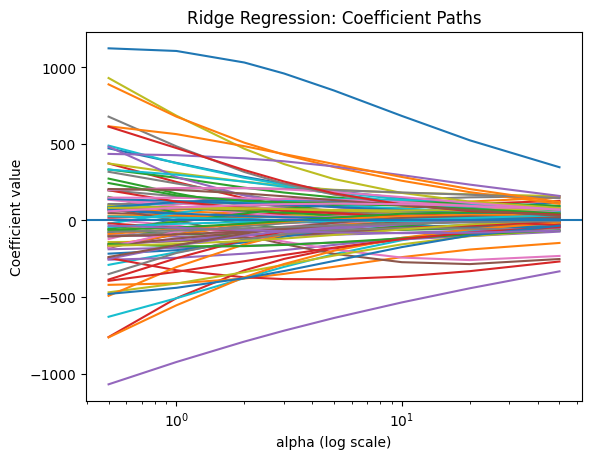

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Valores de alpha en escala logarítmica
alphas = [0.5, 1, 2, 3, 5, 10, 20, 50]

coefs = []

# Re-initialize X_train_scaled, X_test_scaled, y_train, y_test from X_crime and y_crime
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

plt.figure()
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Ridge Regression: Coefficient Paths')
plt.axhline(0)
plt.show()

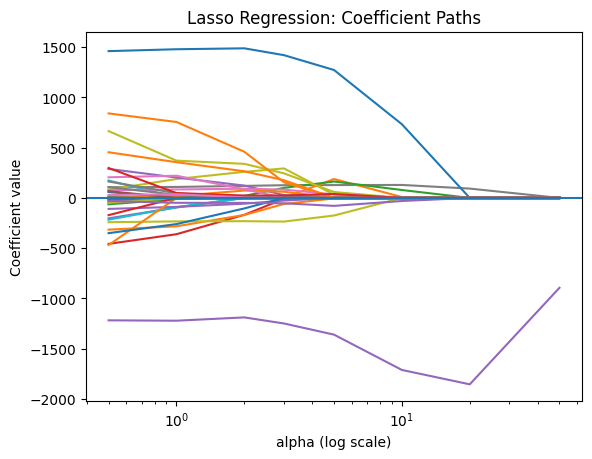

In [12]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.linear_model import Lasso

alphas = [0.5, 1, 2, 3, 5, 10, 20, 50]

coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

plt.figure()
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Lasso Regression: Coefficient Paths')
plt.axhline(0)
plt.show()


**Interpretación conceptual**

Ridge: todos los coeficientes se contraen suavemente hacia 0

Lasso: muchos coeficientes llegan exactamente a 0

Estas curvas describen la ruta completa de soluciones del modelo.

Son una herramienta clave para entender: Regularización, Complejidad del modelo, Selección de variables